In [1]:
import os
import joblib
import sys
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.svm import SVC
sys.path.append(os.path.abspath("C:/Users/euderasm/GitHub/ud120-projects/tools/"))
from feature_format import featureFormat, targetFeatureSplit

In [2]:
data_dict = joblib.load(open("C:/Users/euderasm/GitHub/ud120-projects/final_project/final_project_dataset.pkl", "rb") )

In [3]:
### add more features to features_list!
features_list = ["poi", "salary"]

data = featureFormat(data_dict, features_list)
labels, features = targetFeatureSplit(data)

In [4]:
labels.count(1.0)

17

In [19]:
features_train, features_test, labels_train, labels_test = train_test_split(
    features, labels, test_size=0.3, random_state=42, shuffle=True)

clf = SVC(kernel="linear", C=1.)
clf.fit(features_train, labels_train)
print("Acurácia:",round(clf.score(features_test, labels_test)*100,2), "%")

Acurácia: 93.1 %


In [20]:
#How many POIs are in the test set?
labels_test.count(1.0)

2

Precision: 1.0
Recall: 0.0
F1-Score: 0.0


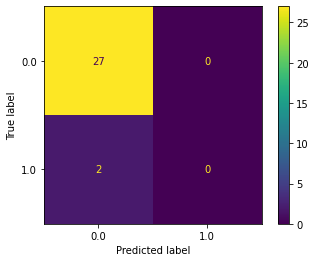

In [24]:
#Confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, f1_score
from sklearn.metrics import precision_score, recall_score
print("Precision:",precision_score(labels_test, clf.predict(features_test),zero_division=1))
print("Recall:",recall_score(labels_test, clf.predict(features_test),zero_division=1))
print("F1-Score:",f1_score(labels_test, clf.predict(features_test),zero_division=1))
cm = confusion_matrix(labels_test, clf.predict(features_test), labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()